In [22]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
# 2. Load Dataset
file_path = "indian_vehicle_dataset_jahaganapathi_s (1).csv"
df = pd.read_csv(file_path)


In [24]:
# 3. 🔍 Basic Preprocessing
print("Original shape:", df.shape)

Original shape: (1554, 13)


In [25]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [26]:
# Remove rows with missing EV_Status or invalid values
df = df[df['EV_Status'].notna()]
df = df[df['EV_Status'].str.lower().isin(['yes', 'no'])]

In [27]:
# Fill or drop missing numerical values
numerical_cols = ['Units_Sold', 'Price', 'Mileage_kmpl', 'CO2_Emission_g_km']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=numerical_cols, inplace=True)


In [28]:
print("After cleaning:", df.shape)

After cleaning: (1554, 13)


In [29]:
# 4. Filter for Electric Vehicles only
df_ev = df[df['EV_Status'].str.lower() == 'yes']


In [30]:
# 5. Select Features for Clustering
features = ['Units_Sold', 'Price', 'Mileage_kmpl', 'CO2_Emission_g_km']
X = df_ev[features]

In [31]:
# 6. Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# 7. Elbow Method
inertia = []
k_range = range(1, 11)

In [33]:

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


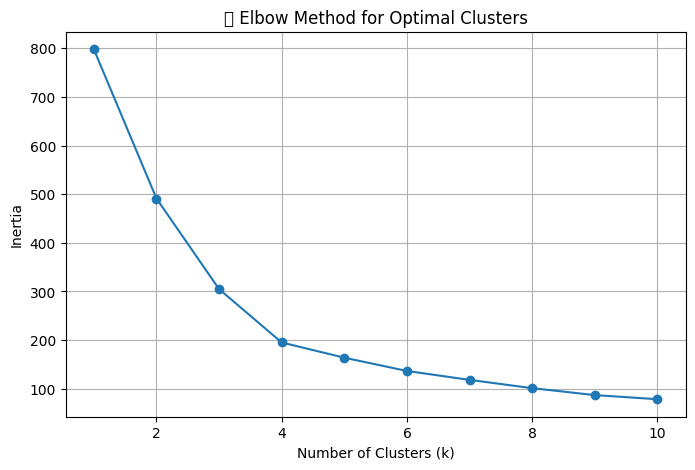

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('🔍 Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [35]:
# 8. Apply KMeans with optimal k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_ev['Cluster'] = kmeans.fit_predict(X_scaled)

<ipython-input-35-312316f42d27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ev['Cluster'] = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


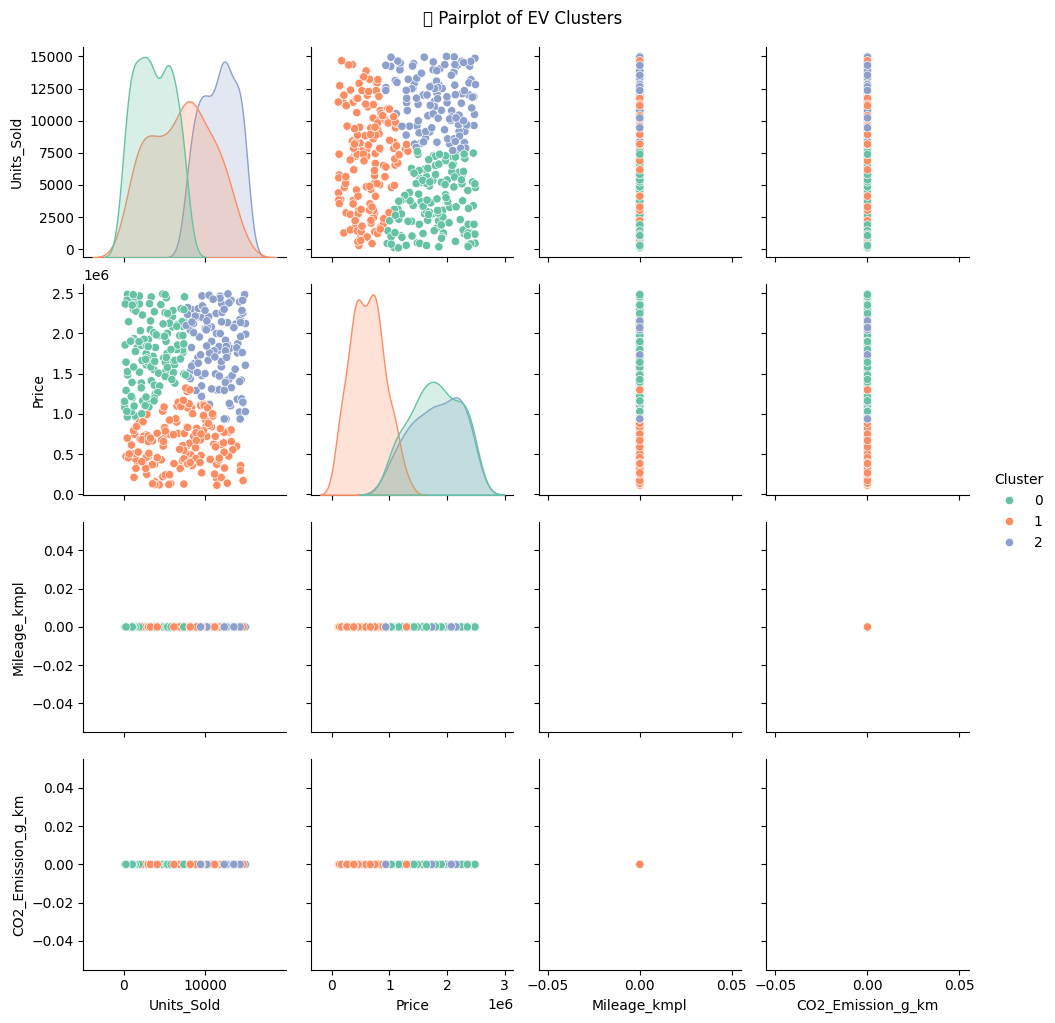

In [36]:
# 9. Pair Plot of Clusters
sns.pairplot(df_ev, hue='Cluster', vars=features, palette='Set2')
plt.suptitle("📌 Pairplot of EV Clusters", y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


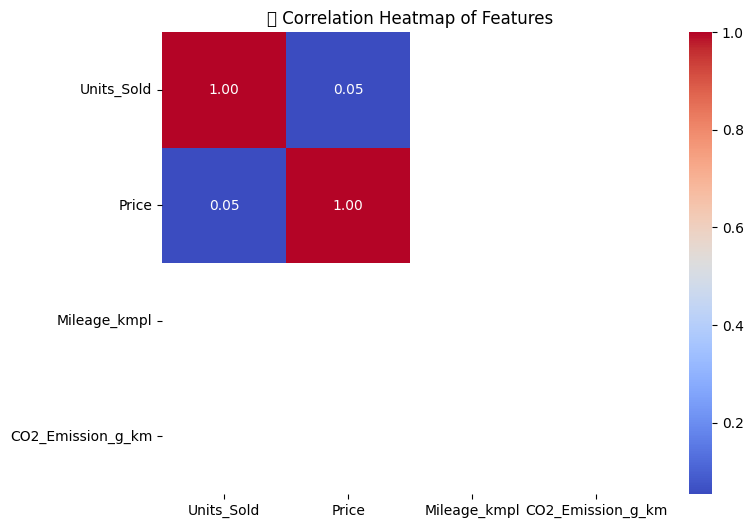

In [37]:
# 10. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_ev[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔥 Correlation Heatmap of Features")
plt.show()

<ipython-input-38-c294f75c88b8>:6: UserWarning: Glyph 127981 (\N{FACTORY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127981 (\N{FACTORY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


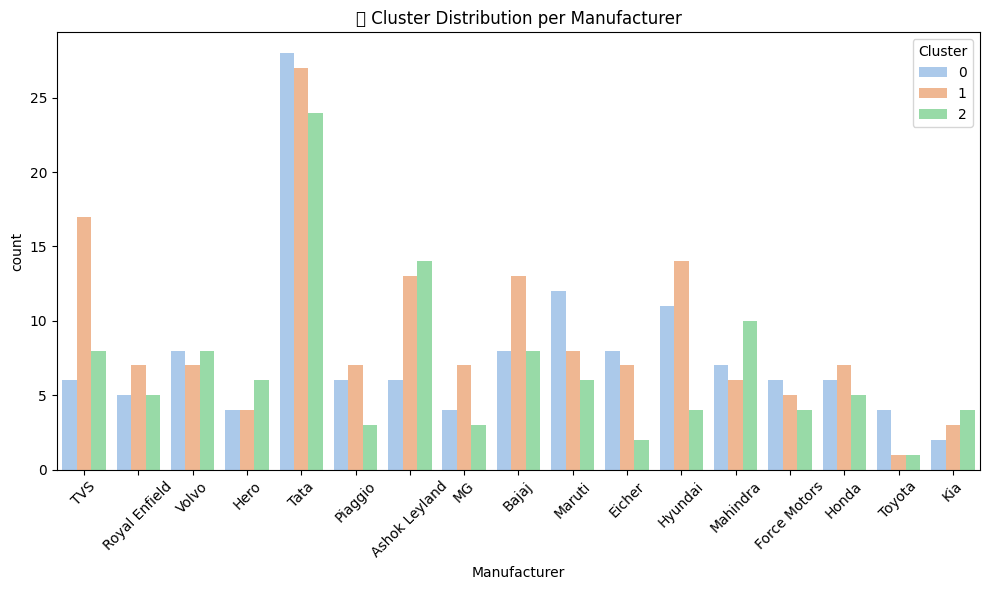

In [38]:
# 11. Cluster Count per Manufacturer
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ev, x='Manufacturer', hue='Cluster', palette='pastel')
plt.title("🏭 Cluster Distribution per Manufacturer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# 12. PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_ev['PCA1'] = X_pca[:, 0]
df_ev['PCA2'] = X_pca[:, 1]

<ipython-input-39-e0c7e30db660>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ev['PCA1'] = X_pca[:, 0]
<ipython-input-39-e0c7e30db660>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ev['PCA2'] = X_pca[:, 1]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


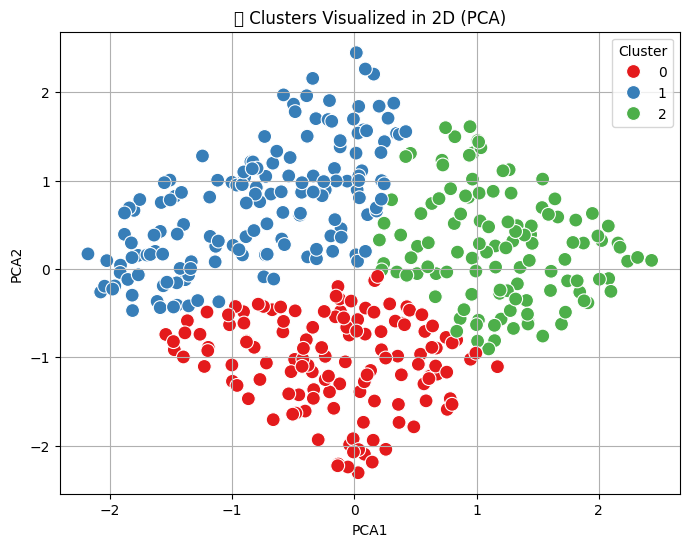

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_ev, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)
plt.title("🎯 Clusters Visualized in 2D (PCA)")
plt.grid(True)
plt.show()